In [74]:
import cv2

In [75]:
from deepface import DeepFace

In [76]:
img=cv2.imread('./Angry.jpg')

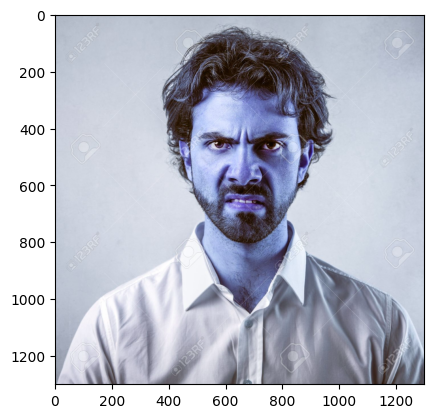

In [77]:
import matplotlib.pyplot as plt
plt.imshow(img)

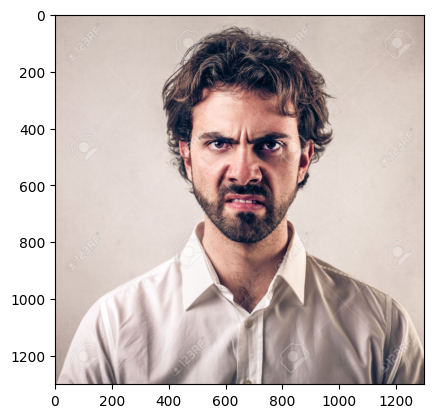

In [78]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [79]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.68s/it]   


In [80]:
predictions

[{'emotion': {'angry': 99.66002106666565,
   'disgust': 4.770902749648485e-28,
   'fear': 7.885036373833643e-10,
   'happy': 4.261374933478557e-09,
   'sad': 0.016069921548478305,
   'surprise': 5.517774212255959e-13,
   'neutral': 0.3239125246182084},
  'dominant_emotion': 'angry',
  'region': {'x': 410,
   'y': 276,
   'w': 483,
   'h': 483,
   'left_eye': (767, 458),
   'right_eye': (566, 457)},
  'face_confidence': 0.92,
  'age': 34,
  'gender': {'Woman': 0.0002079577825497836, 'Man': 99.99979734420776},
  'dominant_gender': 'Man',
  'race': {'asian': 0.35016264783142237,
   'indian': 18.726669999758006,
   'black': 0.6455785290952291,
   'white': 17.181561329178653,
   'middle eastern': 47.12457095091689,
   'latino hispanic': 15.971454564159565},
  'dominant_race': 'middle eastern'}]

In [81]:
print("Race:")
predictions[0]['dominant_race']

Race:


'middle eastern'

In [82]:
print("Emotion:")
predictions[0]['dominant_emotion']

Emotion:


'angry'

In [83]:
print("Gender:")
predictions[0]['dominant_gender']

Gender:


'Man'

In [84]:
print("Age:")
predictions[0]['age']

Age:


34

In [85]:
FaceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [86]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=FaceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

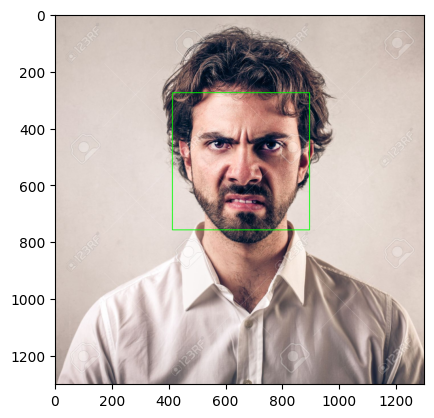

In [87]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [88]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0,50),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);

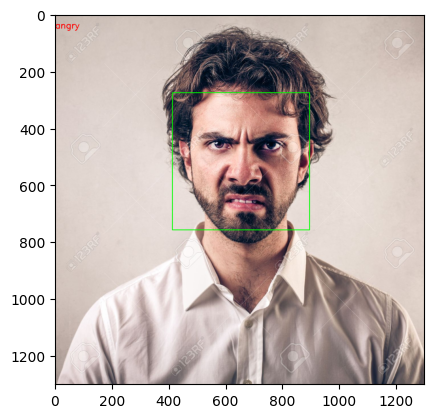

In [89]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [92]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture image")
        break
    
    try:
        
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray, 1.1, 4)
        
        
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                    result[0]['dominant_emotion'],
                    (50, 50),
                    font, 3,
                    (0, 0, 255),
                    2,
                    cv2.LINE_4)
        
    except ValueError as e:
        print(f"Error during DeepFace analysis: {str(e)}")

    cv2.imshow('Demo video', frame)

    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()